In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cupy as cp
from cupyx.scipy import ndimage
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from datetime import datetime
from PIL import Image
import pickle
import os
import sys
import matplotlib.pyplot as plt
import itertools
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D


def backward_elim(X_iter, y, n_feats):
    n_iter = X_iter.shape[1]
    save = []
    cv = cross_val_score(model, X_iter, y, cv = 5, scoring = "neg_mean_squared_error")
    temp_error = cv.mean()
    temp_std = cv.std()
    save.append((temp_error, temp_std))
    
    while n_iter > n_feats:
        feat_ix = list(range(X_iter.shape[1]))
    
        min_ix = 0
        min_error = -np.infty
        min_std = np.infty
        for ix in feat_ix:
            cols = feat_ix[:ix] + feat_ix[ix+1:]
            temp_df = X_iter.iloc[:, cols]
            cv = cross_val_score(model, temp_df, y, cv = 5, scoring = "neg_mean_squared_error")
            temp_error = cv.mean()
            temp_std = cv.std()
            if temp_error > min_error:
                min_ix = ix
                min_error = temp_error
                min_std = temp_std
        save.append((min_error, min_std))
        cols = feat_ix[:min_ix] + feat_ix[min_ix+1:]
        X_iter = X_iter.iloc[:, cols]
        print(X_iter.columns)
        n_iter = X_iter.shape[1]
        
    return X_iter, save

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
X = labeled_df.iloc[:, 0].values.reshape(-1,1)
y = labeled_df.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

kernel = RBF(length_scale=0.1)
gpr = GaussianProcessRegressor()
scores = cross_val_score(gpr, X, y, cv=5, scoring="neg_mean_squared_error")
print(scores.mean())

In [3]:
# train discriminator
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = MinMaxScaler()
df = pd.read_csv("all_sigmas_df_comb.csv")
#df = np.log(df+1e-5)
#df_scaled = scaler.fit_transform(df.iloc[:, :-4])
#X = pd.DataFrame(df_scaled)
#X.columns = df.iloc[:, :-4].columns.values
X = df.iloc[:, :-4]
y = df.iloc[:, -1] 
#model = MLPRegressor(max_iter=500) #
model = SVR(kernel='rbf', C=1)


X_reduc, log = backward_elim(X, y, 1)
df[X_reduc.columns.values]
#model = model.fit(X_reduc, y)

Index(['200_density', '200_grad', '400_grad', '600_density', '600_grad',
       '800_density', '800_grad', '1000_density', '1000_grad', '1400_density',
       '1400_grad', '1800_density', '1800_grad', '2200_density', '2200_grad',
       '2600_density', '2600_grad'],
      dtype='object')
Index(['200_density', '200_grad', '400_grad', '600_density', '600_grad',
       '800_density', '800_grad', '1000_density', '1000_grad', '1400_density',
       '1400_grad', '1800_grad', '2200_density', '2200_grad', '2600_density',
       '2600_grad'],
      dtype='object')
Index(['200_density', '200_grad', '400_grad', '600_grad', '800_density',
       '800_grad', '1000_density', '1000_grad', '1400_density', '1400_grad',
       '1800_grad', '2200_density', '2200_grad', '2600_density', '2600_grad'],
      dtype='object')
Index(['200_density', '200_grad', '400_grad', '600_grad', '800_density',
       '800_grad', '1000_density', '1000_grad', '1400_density', '1400_grad',
       '1800_grad', '2200_grad', '260

,200_density
0,8656.933030
1,8656.933030
2,7391.419336
3,7590.690018
4,7582.769376
...,...
563,7391.488390
564,7467.671663
565,7588.002272
566,10359.303730


In [4]:
# get features from backward elimination
cols = X_reduc.columns.values
print(cols)
sigmas = [int(''.join(filter(str.isdigit, item))) for item in X_reduc.columns.values]
uniq_sigs = sorted(list(set(sigmas)))
print(uniq_sigs)
f_density = lambda x: str(x) + "_density"
f_grad = lambda x: str(x) + "_grad"
all_feats = [f(sigma) for sigma in uniq_sigs for f in (f_density, f_grad)]
ix_sigs = [all_feats.index(col) for col in cols]

X_reduc.columns.values

['200_density']
[200]


array(['200_density'], dtype=object)

<AxesSubplot:>

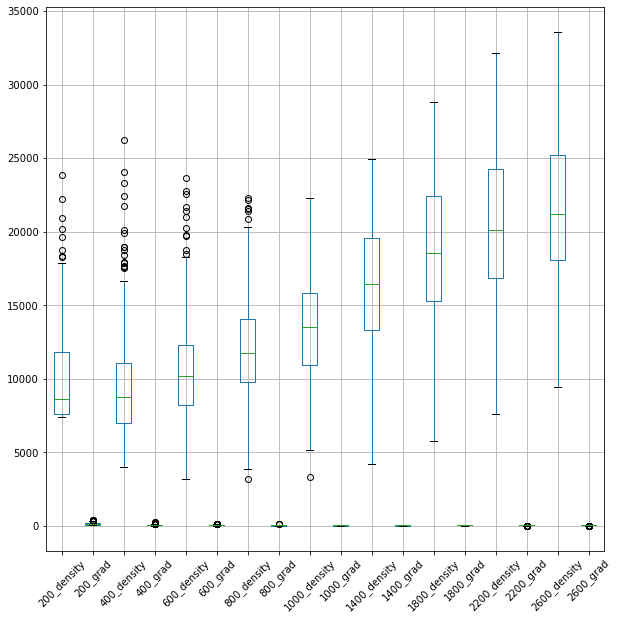

In [5]:
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

<AxesSubplot:>

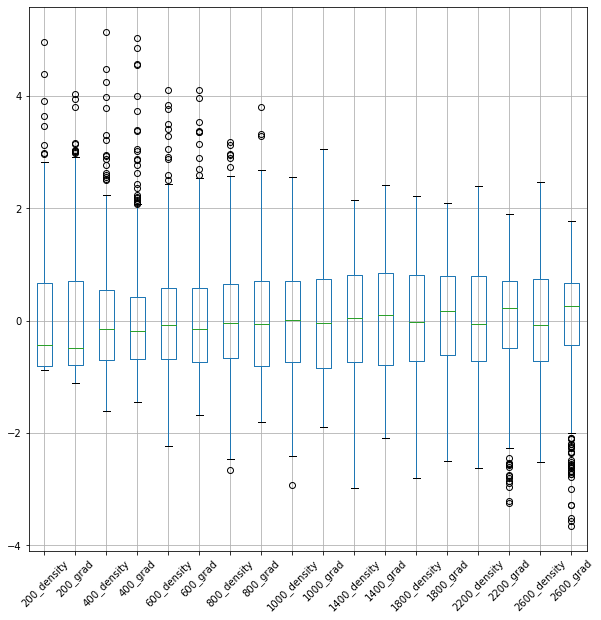

In [44]:
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

<AxesSubplot:>

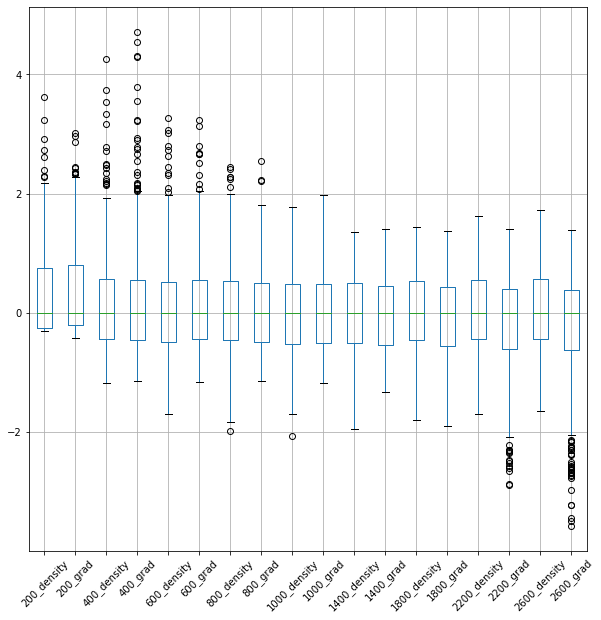

In [42]:
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

<AxesSubplot:>

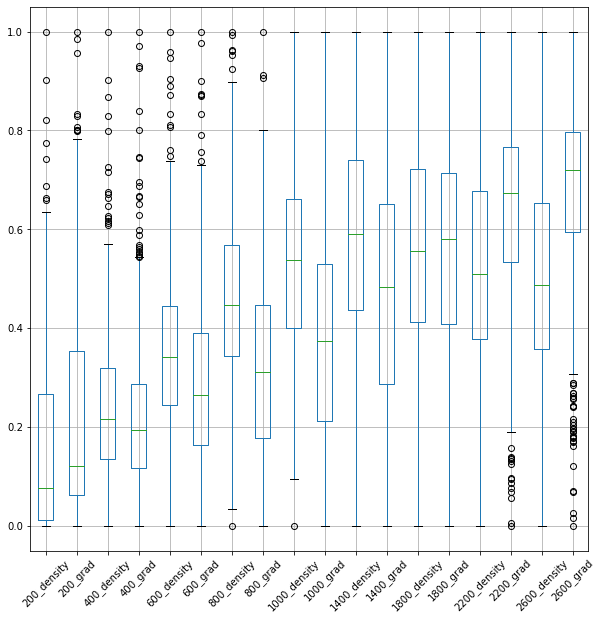

In [39]:
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

(array([ 92., 172., 139.,  98.,  40.,  11.,   9.,   3.,   2.,   2.]),
 array([-1.60638481, -0.93104805, -0.2557113 ,  0.41962546,  1.09496221,
         1.77029897,  2.44563572,  3.12097248,  3.79630923,  4.47164599,
         5.14698274]),
 <BarContainer object of 10 artists>)

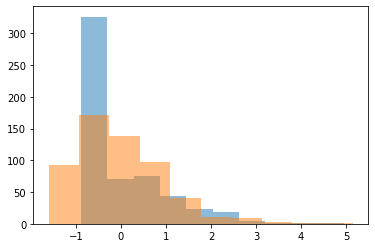

In [7]:
# standard
plt.hist(X["200_density"].values, alpha=0.5)
plt.hist(X["400_density"].values, alpha=0.5)

(array([ 92., 172., 139.,  98.,  40.,  11.,   9.,   3.,   2.,   2.]),
 array([-1.16981545, -0.62624104, -0.08266663,  0.46090778,  1.00448219,
         1.5480566 ,  2.09163101,  2.63520542,  3.17877983,  3.72235424,
         4.26592865]),
 <BarContainer object of 10 artists>)

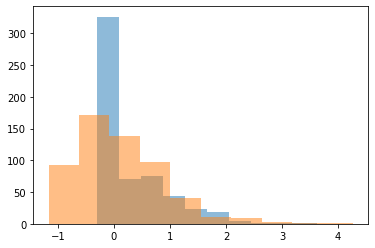

In [5]:
# robust
plt.hist(X["200_density"].values, alpha=0.5)
plt.hist(X["400_density"].values, alpha=0.5)

(array([ 92., 172., 139.,  98.,  40.,  11.,   9.,   3.,   2.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

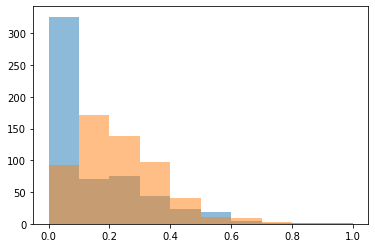

In [9]:
# minmax
plt.hist(X["200_density"].values, alpha=0.5)
plt.hist(X["400_density"].values, alpha=0.5)

In [31]:
np.corrcoef(X["200_density"].values, y)

array([[1.      , 0.456301],
       [0.456301, 1.      ]])

In [34]:
np.corrcoef(X["1800_grad"].values, y)

array([[ 1.        , -0.04292004],
       [-0.04292004,  1.        ]])

In [33]:
log

[(-0.029711157234178394, 0.014904548833683659),
 (-0.028606095597034864, 0.015241198887826895),
 (-0.028094901983341542, 0.014776654661325047),
 (-0.027643364596096655, 0.014396257448731395),
 (-0.027352977909457843, 0.014170575503517087),
 (-0.027208458508663085, 0.014455725504211196),
 (-0.02670508064336203, 0.014291607359303397),
 (-0.02641399382180374, 0.014262465299874523),
 (-0.02610096243411993, 0.014125926003911415),
 (-0.025566140570129896, 0.01388867084398673),
 (-0.025411800431892707, 0.013197676923437993),
 (-0.025140454396923022, 0.0130690232608612),
 (-0.024846287079760783, 0.01311395788664731),
 (-0.024422491964907554, 0.01393787255982922),
 (-0.02411384634592083, 0.013661157604598049),
 (-0.024094419011294797, 0.014293453521078543),
 (-0.02409805758861842, 0.015047774615660332),
 (-0.024129485573749204, 0.015832191861537087)]

<ErrorbarContainer object of 3 artists>

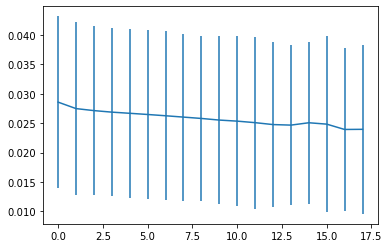

In [51]:
mean_scores = [item[0] for item in log]
std_scores = [item[1] for item in log]

std_scores

x = list(range(len(mean_scores)))
plt.errorbar(x, -1*np.array(mean_scores), yerr = std_scores)

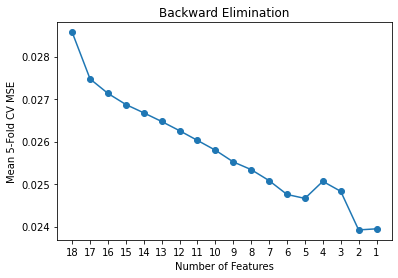

In [52]:
hi = list(X.shape[1] - np.array(list(range(len(mean_scores)))))
hi = [str(x) for x in hi]

plt.rc('font', family='sans-serif')
plt.plot(-1*np.array(mean_scores), marker = 'o')
plt.title("Backward Elimination")
plt.ylabel("Mean 5-Fold CV MSE")
plt.xlabel("Number of Features")
plt.xticks(list(range(len(log))), hi)
#plt.yticks(-1*np.array(log))
plt.savefig("backward_elim.jpeg", bbox_inches="tight", dpi=200)
plt.show()

<AxesSubplot:>

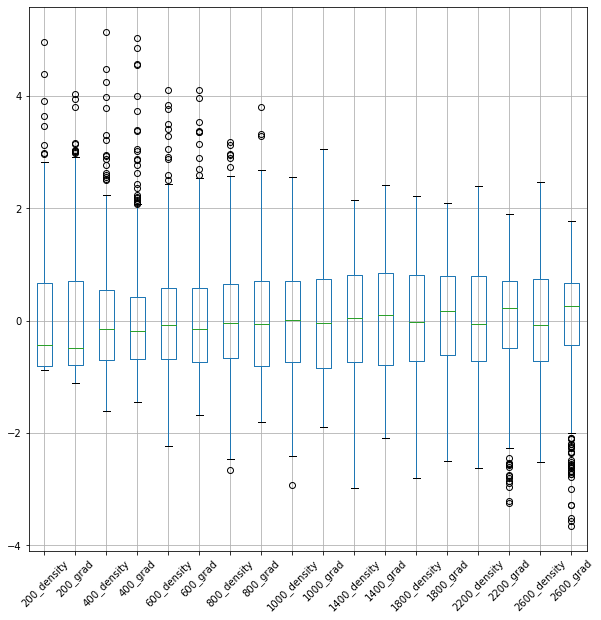

In [12]:
# Standard scaling (best feats: ['400_density' '1800_grad'])
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

<AxesSubplot:>

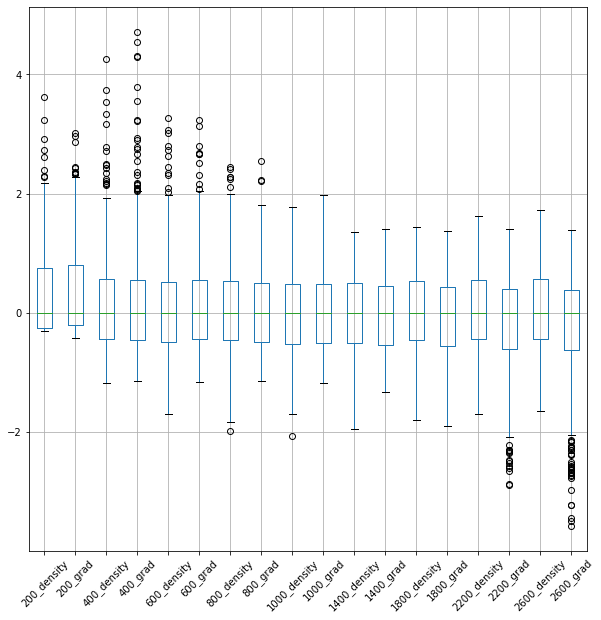

In [9]:
# Robust scaling (best feats: ['200_density' '2600_grad'])
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

In [ ]:
# Standard scaling (best feats: ['400_density' '1800_grad'])
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

<AxesSubplot:>

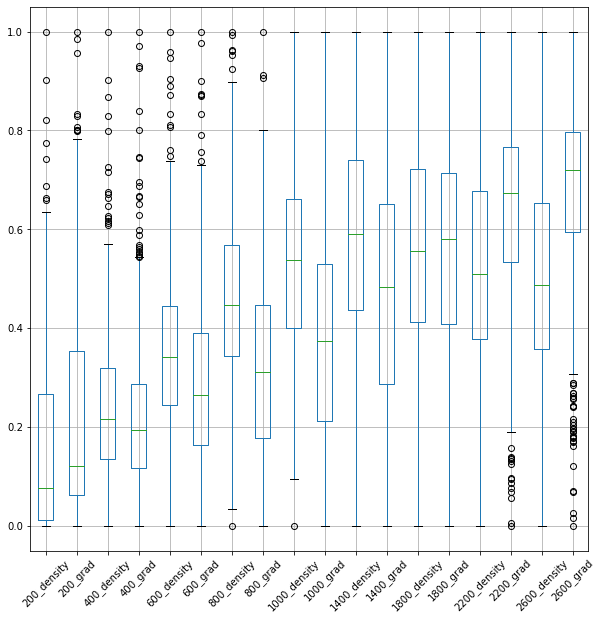

In [5]:
# Min Max Scaling (best feats: ['200_density' '1800_density'])
plt.figure(figsize=(10,10))
X.boxplot(rot=45)

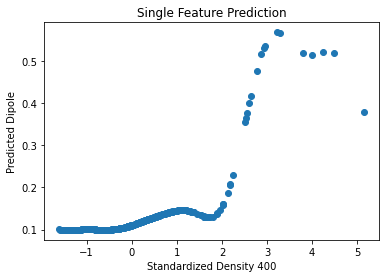

In [46]:
plt.plot(X_reduc.iloc[:,0].values, model.predict(x.reshape(-1,1)), "o")
plt.xlabel("Standardized Density 400")
plt.ylabel("Predicted Dipole")
plt.title("Single Feature Prediction")
plt.show()

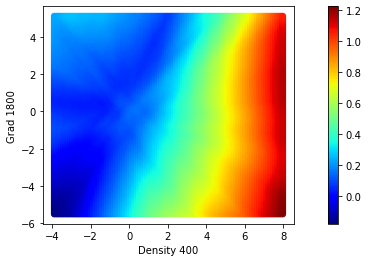

In [92]:
def scatter2d(x,y, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    plt.scatter(x, y, c=scalarMap.to_rgba(cs))
    plt.xlabel('Density 400')
    plt.ylabel('Grad 1800')
    scalarMap.set_array(cs)
    plt.colorbar(scalarMap, pad=0.1)
    plt.show()

xref = X_reduc.iloc[:, 0]
yref = X_reduc.iloc[:, 1]    

xstd = np.std(xref)
ystd = np.std(yref)

xmin, xmax = min(xref), max(xref)
ymin, ymax = min(yref), max(yref)

x = np.linspace(xmin - 3*xstd, xmax + 3*xstd, 100)
y = np.linspace(ymin - 3*ystd, ymax + 3*ystd, 100)


a = [x,y]
points = np.array(list(itertools.product(*a)))

preds = model.predict(points)

scatter2d(points[:, 0], points[:, 1], preds)

In [ ]:
%matplotlib notebook



def scatter3d(x, y, z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    ax.set_xlabel('Grada 2600')
    ax.set_ylabel('Grad 1800')
    ax.set_zlabel('Density 400')
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap, pad=0.2)
    plt.show()
    
xref = X_reduc.iloc[:, 2]
yref = X_reduc.iloc[:, 1]
zref = X_reduc.iloc[:, 0]

xstd = np.std(xref)
ystd = np.std(yref)
zstd = np.std(zref)

xmin, xmax = min(xref), max(xref)
ymin, ymax = min(yref), max(yref)
zmin, zmax = min(zref), max(zref)

std_mult = 0
x = np.linspace(xmin - std_mult*xstd, xmax + std_mult*xstd, 100)
y = np.linspace(ymin - std_mult*ystd, ymax + std_mult*ystd, 100)
z = np.linspace(zmin - std_mult*zstd, zmax + std_mult*zstd, 100)

a = [x,y,z]
points = np.array(list(itertools.product(*a)))

preds = model.predict(points)

scatter3d(points[:, 0], points[:, 1], points[:, 2], preds)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()
scale = MinMaxScaler()

In [ ]:
X_reduce_scale = scaler.fit_transform(X_reduc)
X_red_scale = scale.fit_transform(X_reduc)

In [ ]:
pd.DataFrame(X_red_scale).describe()

In [ ]:
model.fit(X_red_scale, y)

In [ ]:
ye = np.linspace(0,1,10)

In [ ]:
preds = model.predict(points)

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], cmap='viridis', edgecolor='none')

In [ ]:
X_reduc

In [ ]:
X_plot = X_reduc.round(0)

In [ ]:
X_plot

In [ ]:
stepd200, stepg200, stepd1000

In [ ]:
data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
#Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(min_d200, max_d200, stepd200), np.arange(min_g200, max_g200, stepg200), np.arange(min_d1000, max_d1000, stepd1000))
# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, -1], Y[:, :, -1], data[:, :, -1],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 1000, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 1000, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
)

# Set distance and angle view
ax.view_init(40, -30)
ax.dist = 11

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
ax.plot_wireframe(points[:, 0], points[:, 1], points[:, 2], rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from cupyx.scipy import ndimage
import cupy as cp

In [ ]:
with open("log3.txt", "rb") as fp:
    log3 = pickle.load(fp)

image3 = Image.open('final_seed_3.png')

In [ ]:
im3 = np.asarray(image3)
centroids3 = log3[-1][-1]

In [ ]:
df = pd.read_csv("random_features_dipole_v3.csv")

In [ ]:
df.iloc[:, :-3].reindex(sorted(df.iloc[:, :-4]), axis=1).corr()

In [ ]:
cols = ['density200', 'grad200', 'density400', 'grad400', 'density600',
       'grad600', 'density800', 'grad800','dipole']

In [ ]:
df[cols].corr()

In [ ]:
from sklearn.svm import SVR

regr = SVR()

X = df[cols[:-1]]

y = df[cols[-1]]

regr.fit(X, y)

In [ ]:
regr.

In [ ]:
i, c, d = generate_window(40, 1/16, 100, 3)

In [ ]:
hih = np.array(c)
plt.scatter(hih[:, 1]//200, hih[:, 0]//200)

In [ ]:
plt.scatter(df[df.seeds == 3].cy, df[df.seeds == 3].cx)

In [ ]:
ya = df[df.seeds == 7]
plt.hist(ya.density400)
plt.show()
plt.hist(ya.grad400)
plt.show()

In [ ]:
def generate_window(window_size, p, pad, seed):
    np.random.seed(seed)
    random_pattern = np.random.rand(window_size, window_size)
    binary_pattern = np.where(random_pattern < p, 1, 0)

    org_locs = np.argwhere(binary_pattern == 1)

    org_locs_scaled = org_locs*200+pad
    pattern_dim_scaled = window_size*200+2*pad
    
    centroids = []
    im = np.zeros((pattern_dim_scaled, pattern_dim_scaled))

    for y, x in org_locs_scaled:
        im[y:y+150,x:x+150] = 255
        centroids.append((y+75, x+75))
    
    return im, centroids, pattern_dim_scaled

In [ ]:
plt.imshow(hi)

In [ ]:
hifeats = extract_features(hi, 400, centroids)

In [ ]:
plt.hist(hifeats[:, 0])
plt.show()

In [ ]:
hifeats[:, 0].shape

In [ ]:
np.sum(hifeats[:, 0] > 14000)

In [ ]:
def extract_features(image, sigma, centroids):
    mempool = cp.get_default_memory_pool()
    pinned_mempool = cp.get_default_pinned_memory_pool()

    im_blur = ndimage.gaussian_filter(cp.array(image), sigma=sigma, mode='constant',cval=0)

    im_blur_norm=im_blur*sigma*cp.sqrt(np.pi)

    im_sx = ndimage.sobel(im_blur_norm, axis=1, mode='reflect')
    im_sy = ndimage.sobel(im_blur_norm, axis=0, mode='reflect')
    im_sobel=np.hypot(im_sx, im_sy)

    feats = []
   
    for centroid in centroids:
        y, x = centroid[0], centroid[1]
        density = cp.nanmean(im_blur_norm[x-75: x+75, y-75: y+75])
        grad = cp.nanmean(im_sobel[x-75: x+75, y-75: y+75])
        feats.append([density.get(), grad.get()])

    mempool.free_all_blocks()
    pinned_mempool.free_all_blocks()

    feats = np.array(feats)
    return feats

In [ ]:
with open("log3.txt", "rb") as fp:
    log3 = pickle.load(fp)

image3 = Image.open('final_seed_3.png')

im3 = np.asarray(image3)
centroids3 = log3[-1][-1]

feats3 = extract_features(im3.astype(np.float64), 400, centroids3)

plt.imshow(im3)
plt.scatter(centroids3[0][1], centroids3[0][0], c = "red", s=10)
plt.scatter(centroids3[1][1], centroids3[1][0], c = "red", s=10)
plt.show()

hi, centroids, _ = generate_window(40, 1/16, 100, 3)
o3 = extract_features(hi, 400, centroids)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 12)
axs[0, 0].hist(o3[:, 0])
axs[0, 0].set_title("Ground Truth Iter 1: Density Sigma 400 Histogram")
axs[0, 1].hist(feats3[:, 0])
axs[0, 1].set_title('Generated Iter 1: Density Sigma 400 Histogram')
axs[1, 0].hist(o3[:, 1])
axs[1, 0].set_title('Ground Truth Iter 1: Grad Sigma 400 Histogram')
axs[1, 1].hist(feats3[:, 1])
axs[1, 1].set_title('Generated Iter 1: Grad Sigma 400 Histogram')
plt.show()

In [ ]:
with open("log4.txt", "rb") as fp:
    log4 = pickle.load(fp)

image4 = Image.open('final_seed_4.png')

im4 = np.asarray(image4)
centroids4 = log4[-1][-1]

feats4 = extract_features(im4.astype(np.float64), 400, centroids4)

plt.imshow(im4)
plt.scatter(centroids4[0][1], centroids4[0][0], c = "red", s=10)
plt.scatter(centroids4[1][1], centroids4[1][0], c = "red", s=10)
plt.show()

hi, centroids, _ = generate_window(40, 1/16, 100, 4)
o4 = extract_features(hi, 400, centroids)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 12)
axs[0, 0].hist(o4[:, 0])
axs[0, 0].set_title("Ground Truth Iter 1: Density Sigma 400 Histogram")
axs[0, 1].hist(feats4[:, 0])
axs[0, 1].set_title('Generated Iter 1: Density Sigma 400 Histogram')
axs[1, 0].hist(o4[:, 1])
axs[1, 0].set_title('Ground Truth Iter 1: Grad Sigma 400 Histogram')
axs[1, 1].hist(feats4[:, 1])
axs[1, 1].set_title('Generated Iter 1: Grad Sigma 400 Histogram')
plt.show()

In [ ]:
plt.imshow(hi)

In [ ]:
with open("log7.txt", "rb") as fp:
    log7 = pickle.load(fp)

image7 = Image.open('final_seed_7.png')

im7 = np.asarray(image7)
centroids7 = log7[-1][-1]

feats7 = extract_features(im7.astype(np.float64), 400, centroids7)

plt.imshow(im7)
plt.scatter(centroids7[0][1], centroids7[0][0], c = "red", s=10)
plt.scatter(centroids7[1][1], centroids7[1][0], c = "red", s=10)
plt.show()

yo, c7, _ = generate_window(40, 1/16, 100, 7)
o7 = extract_features(yo, 400, c7)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 12)
axs[0, 0].hist(o7[:, 0])
axs[0, 0].set_title("Ground Truth Iter 1: Density Sigma 400 Histogram")
axs[0, 1].hist(feats7[:, 0])
axs[0, 1].set_title('Generated Iter 1: Density Sigma 400 Histogram')
axs[1, 0].hist(o7[:, 1])
axs[1, 0].set_title('Ground Truth Iter 1: Grad Sigma 400 Histogram')
axs[1, 1].hist(feats7[:, 1])
axs[1, 1].set_title('Generated Iter 1: Grad Sigma 400 Histogram')
plt.show()

In [ ]:
np.sum(df[df.seeds == 3].density400 > 14000)

In [ ]:
np.sum(feats3[:, 0] > 14000)

In [ ]:
np.sum(df[df.seeds == 3].grad400 > 120)

In [ ]:
np.sum(feats3[:, 1] > 120)

In [ ]:
plt.hist(df[df.seeds == 4].grad400.values)
plt.title("Ground Truth Iter 1: Gradient Sigma 400 Histogram")
plt.show()

plt.hist(df[df.seeds == 4].density400)
plt.title("Ground Truth Iter 1: Density Sigma 400 Histogram")
plt.show()

In [ ]:
with open("log4.txt", "rb") as fp:
    log4 = pickle.load(fp)

image4 = Image.open('final_seed_4.png')

im4 = np.asarray(image4)
centroids4 = log4[-1][-1]

feats4 = extract_features(im4, 400, centroids4)

plt.imshow(im4)
plt.scatter(centroids4[0][1], centroids4[0][0], c = "red", s=10)
plt.scatter(centroids4[1][1], centroids4[1][0], c = "red", s=10)
plt.show()

plt.hist(feats4[:, 0])
plt.show()

plt.hist(feats4[:, 1])
plt.show()

In [ ]:
with open("log7.txt", "rb") as fp:
    log7 = pickle.load(fp)

image7 = Image.open('final_seed_7.png')

im7 = np.asarray(image7)
centroids7 = log7[-1][-1]

feats7 = extract_features(im7, 400, centroids7)

plt.imshow(im7)
plt.scatter(centroids7[0][1], centroids7[0][0], c = "red", s=10)
plt.scatter(centroids7[1][1], centroids7[1][0], c = "red", s=10)
plt.show()

plt.hist(feats7[:, 0])
plt.show()

plt.hist(feats7[:, 1])
plt.show()

In [ ]:
density347 = np.vstack([feats3[:, 0].reshape(-1,1), feats4[:, 0].reshape(-1,1), feats7[:, 0].reshape(-1,1)])
grad347 = np.vstack([feats3[:, 1].reshape(-1,1), feats4[:, 1].reshape(-1,1), feats7[:, 1].reshape(-1,1)])

In [ ]:
plt.hist(density347)
plt.show()

plt.hist(grad347)
plt.show()

In [ ]:
np.sum(density347 > 15000)

In [ ]:
np.sum(grad347 > 150)

In [ ]:
len(density347)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy import ndimage, misc
from skimage.morphology import skeletonize
import sklearn
from sklearn import linear_model
from sklearn import model_selection 
from tqdm import tqdm
import cv2
import tifffile
import cupy as cp
import matplotlib
from cupyx.scipy import ndimage
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
import random
import time
from PIL import Image
import pickle


In [ ]:
dfHeitorRandom = pd.read_csv("random_features_dipole.csv")
rX, ry = dfHeitorRandom.iloc[:, :-1], dfHeitorRandom.iloc[:, -1]
rxSub = rX[["density_400", "grad_400"]]
scaler = StandardScaler()
rxSubScale = scaler.fit_transform(rxSub)
x, y = rxSubScale[:, 0], rxSubScale[:, 1]

svc = SVR(kernel='linear').fit(rxSubScale, ry.ravel())
rbf_svc = SVR(kernel='rbf').fit(rxSubScale, ry.ravel())
poly_svc = SVR(kernel='poly').fit(rxSubScale, ry.ravel())
sig_svc = SVR(kernel='sigmoid').fit(rxSubScale, ry.ravel())


h = .01
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVR with linear kernel',
          'SVR with RBF kernel',
          'SVR with polynomial (degree 3) kernel',
          'SVR with sigmoid kernel']

plt.figure(figsize=(16,4))
for i, regr in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x, y, c=ry.ravel(), cmap=plt.cm.coolwarm)
    plt.xlabel('Density 400')
    plt.ylabel('Grad 400')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.colorbar()
    plt.title(titles[i])

plt.show()

In [ ]:
bool4density = feats4[:, 0] > 12500
bool4grad = feats4[:, 1] > 100

In [ ]:
feats4scaled = scaler.transform(feats4)

In [ ]:
np.unique(feats4scaled[bool4density][:,0]) 

In [ ]:
len(feats4scaled)

In [ ]:
np.unique(feats4scaled[bool4grad][:, 1])

In [ ]:
bX = pd.read_csv("dfXFilterHeitor.csv")

by = pd.read_csv("dfyFilterHeitor.csv").values

bxSub = bX[["density_400", "grad_400"]]
scaler = StandardScaler()
bxSubScale = scaler.fit_transform(bxSub)

x, y, z = bxSubScale[:, 0], bxSubScale[:, 1], by

svc = SVR(kernel='linear').fit(bxSubScale, by.ravel())
rbf_svc = SVR(kernel='rbf').fit(bxSubScale, by.ravel())
poly_svc = SVR(kernel='poly').fit(bxSubScale, by.ravel())
sig_svc = SVR(kernel='sigmoid').fit(bxSubScale, by.ravel())


h = .01
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVR with linear kernel',
          'SVR with RBF kernel',
          'SVR with polynomial (degree 3) kernel',
          'SVR with sigmoid kernel']

plt.figure(figsize=(16,4))
for i, regr in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(1, 3, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x, y, c=by.ravel(), cmap=plt.cm.coolwarm)
    plt.xlabel('Density 400')
    plt.ylabel('Grad 400')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.colorbar()
    plt.title(titles[i])

plt.show()